In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

C:\Users\GOURAB\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("Health_Risk_Dataset.csv")
df_copy=df.copy()
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.511000,92.59000,1.124000,106.160000,98.460000,37.921000,0.274000
std,5.287517,4.47302,0.329746,17.897562,19.694626,1.113696,0.446232
min,12.000000,74.00000,1.000000,50.000000,60.000000,35.600000,0.000000
25%,17.000000,90.00000,1.000000,94.000000,84.000000,37.100000,0.000000
50%,20.000000,94.00000,1.000000,109.000000,95.500000,37.800000,0.000000
75%,25.000000,96.00000,1.000000,119.000000,109.000000,38.600000,1.000000
max,40.000000,100.00000,2.000000,146.000000,163.000000,41.800000,1.000000


In [5]:
df.isnull().sum()

Patient_ID           0
Respiratory_Rate     0
Oxygen_Saturation    0
O2_Scale             0
Systolic_BP          0
Heart_Rate           0
Temperature          0
Consciousness        0
On_Oxygen            0
Risk_Level           0
dtype: int64

In [6]:
duplicates = df.duplicated().sum()

In [7]:
duplicates

0

In [8]:
duplicate_rows = df[df.duplicated(keep='first')]

In [9]:
df.columns

Index(['Patient_ID', 'Respiratory_Rate', 'Oxygen_Saturation', 'O2_Scale',
       'Systolic_BP', 'Heart_Rate', 'Temperature', 'Consciousness',
       'On_Oxygen', 'Risk_Level'],
      dtype='object')

In [10]:
df["Risk_Level"].unique()

array(['Medium', 'High', 'Low', 'Normal'], dtype=object)

In [11]:
df.drop(columns=['Patient_ID'], inplace=True)

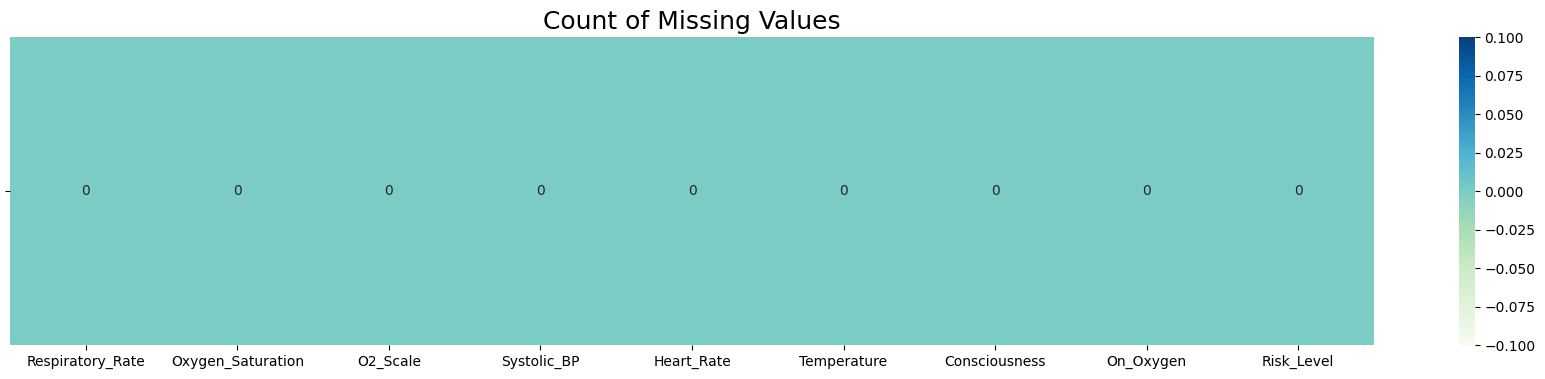

In [12]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

In [13]:
df['Risk_Level'].value_counts()

Risk_Level
Medium    306
High      279
Low       255
Normal    160
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns


scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

print(df.head())
print(df.info())

   Respiratory_Rate  Oxygen_Saturation  O2_Scale  Systolic_BP  Heart_Rate  \
0          0.464286           0.846154       0.0     0.489583    0.456311   
1          0.571429           0.692308       1.0     0.687500    0.883495   
2          0.607143           0.653846       0.0     0.302083    0.728155   
3          0.428571           0.846154       0.0     0.468750    0.310680   
4          0.285714           0.846154       0.0     0.489583    0.359223   

   Temperature  Consciousness  On_Oxygen  Risk_Level  
0     0.306452              0        0.0           2  
1     0.467742              2        1.0           0  
2     0.451613              0        0.0           0  
3     0.274194              0        0.0           2  
4     0.290323              0        0.0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   R

C:\Users\GOURAB\AppData\Local\Temp\ipykernel_4500\4275098421.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


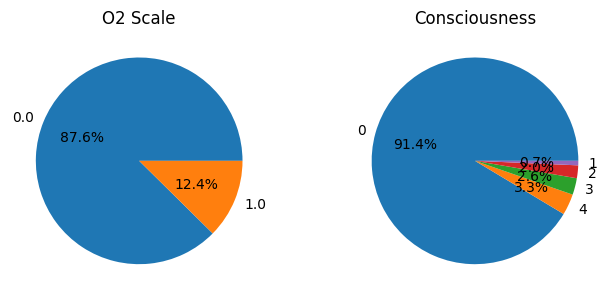

In [15]:
plt.figure(figsize=(12,12))

plt.subplot(2,3,1)
plt.pie(df["On_Oxygen"].value_counts(), labels=df["On_Oxygen"].value_counts().index , autopct='%1.1f%%')
plt.title("On Oxygen",fontsize= 12)


plt.subplot(1,3,1)
plt.pie(df["O2_Scale"].value_counts(), labels=df["O2_Scale"].value_counts().index , autopct='%1.1f%%')
plt.title("O2 Scale",fontsize= 12)

plt.subplot(1,3,2)
plt.pie(df["Consciousness"].value_counts(), labels=df["Consciousness"].value_counts().index , autopct='%1.1f%%')
plt.title("Consciousness",fontsize= 12)

plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.show()

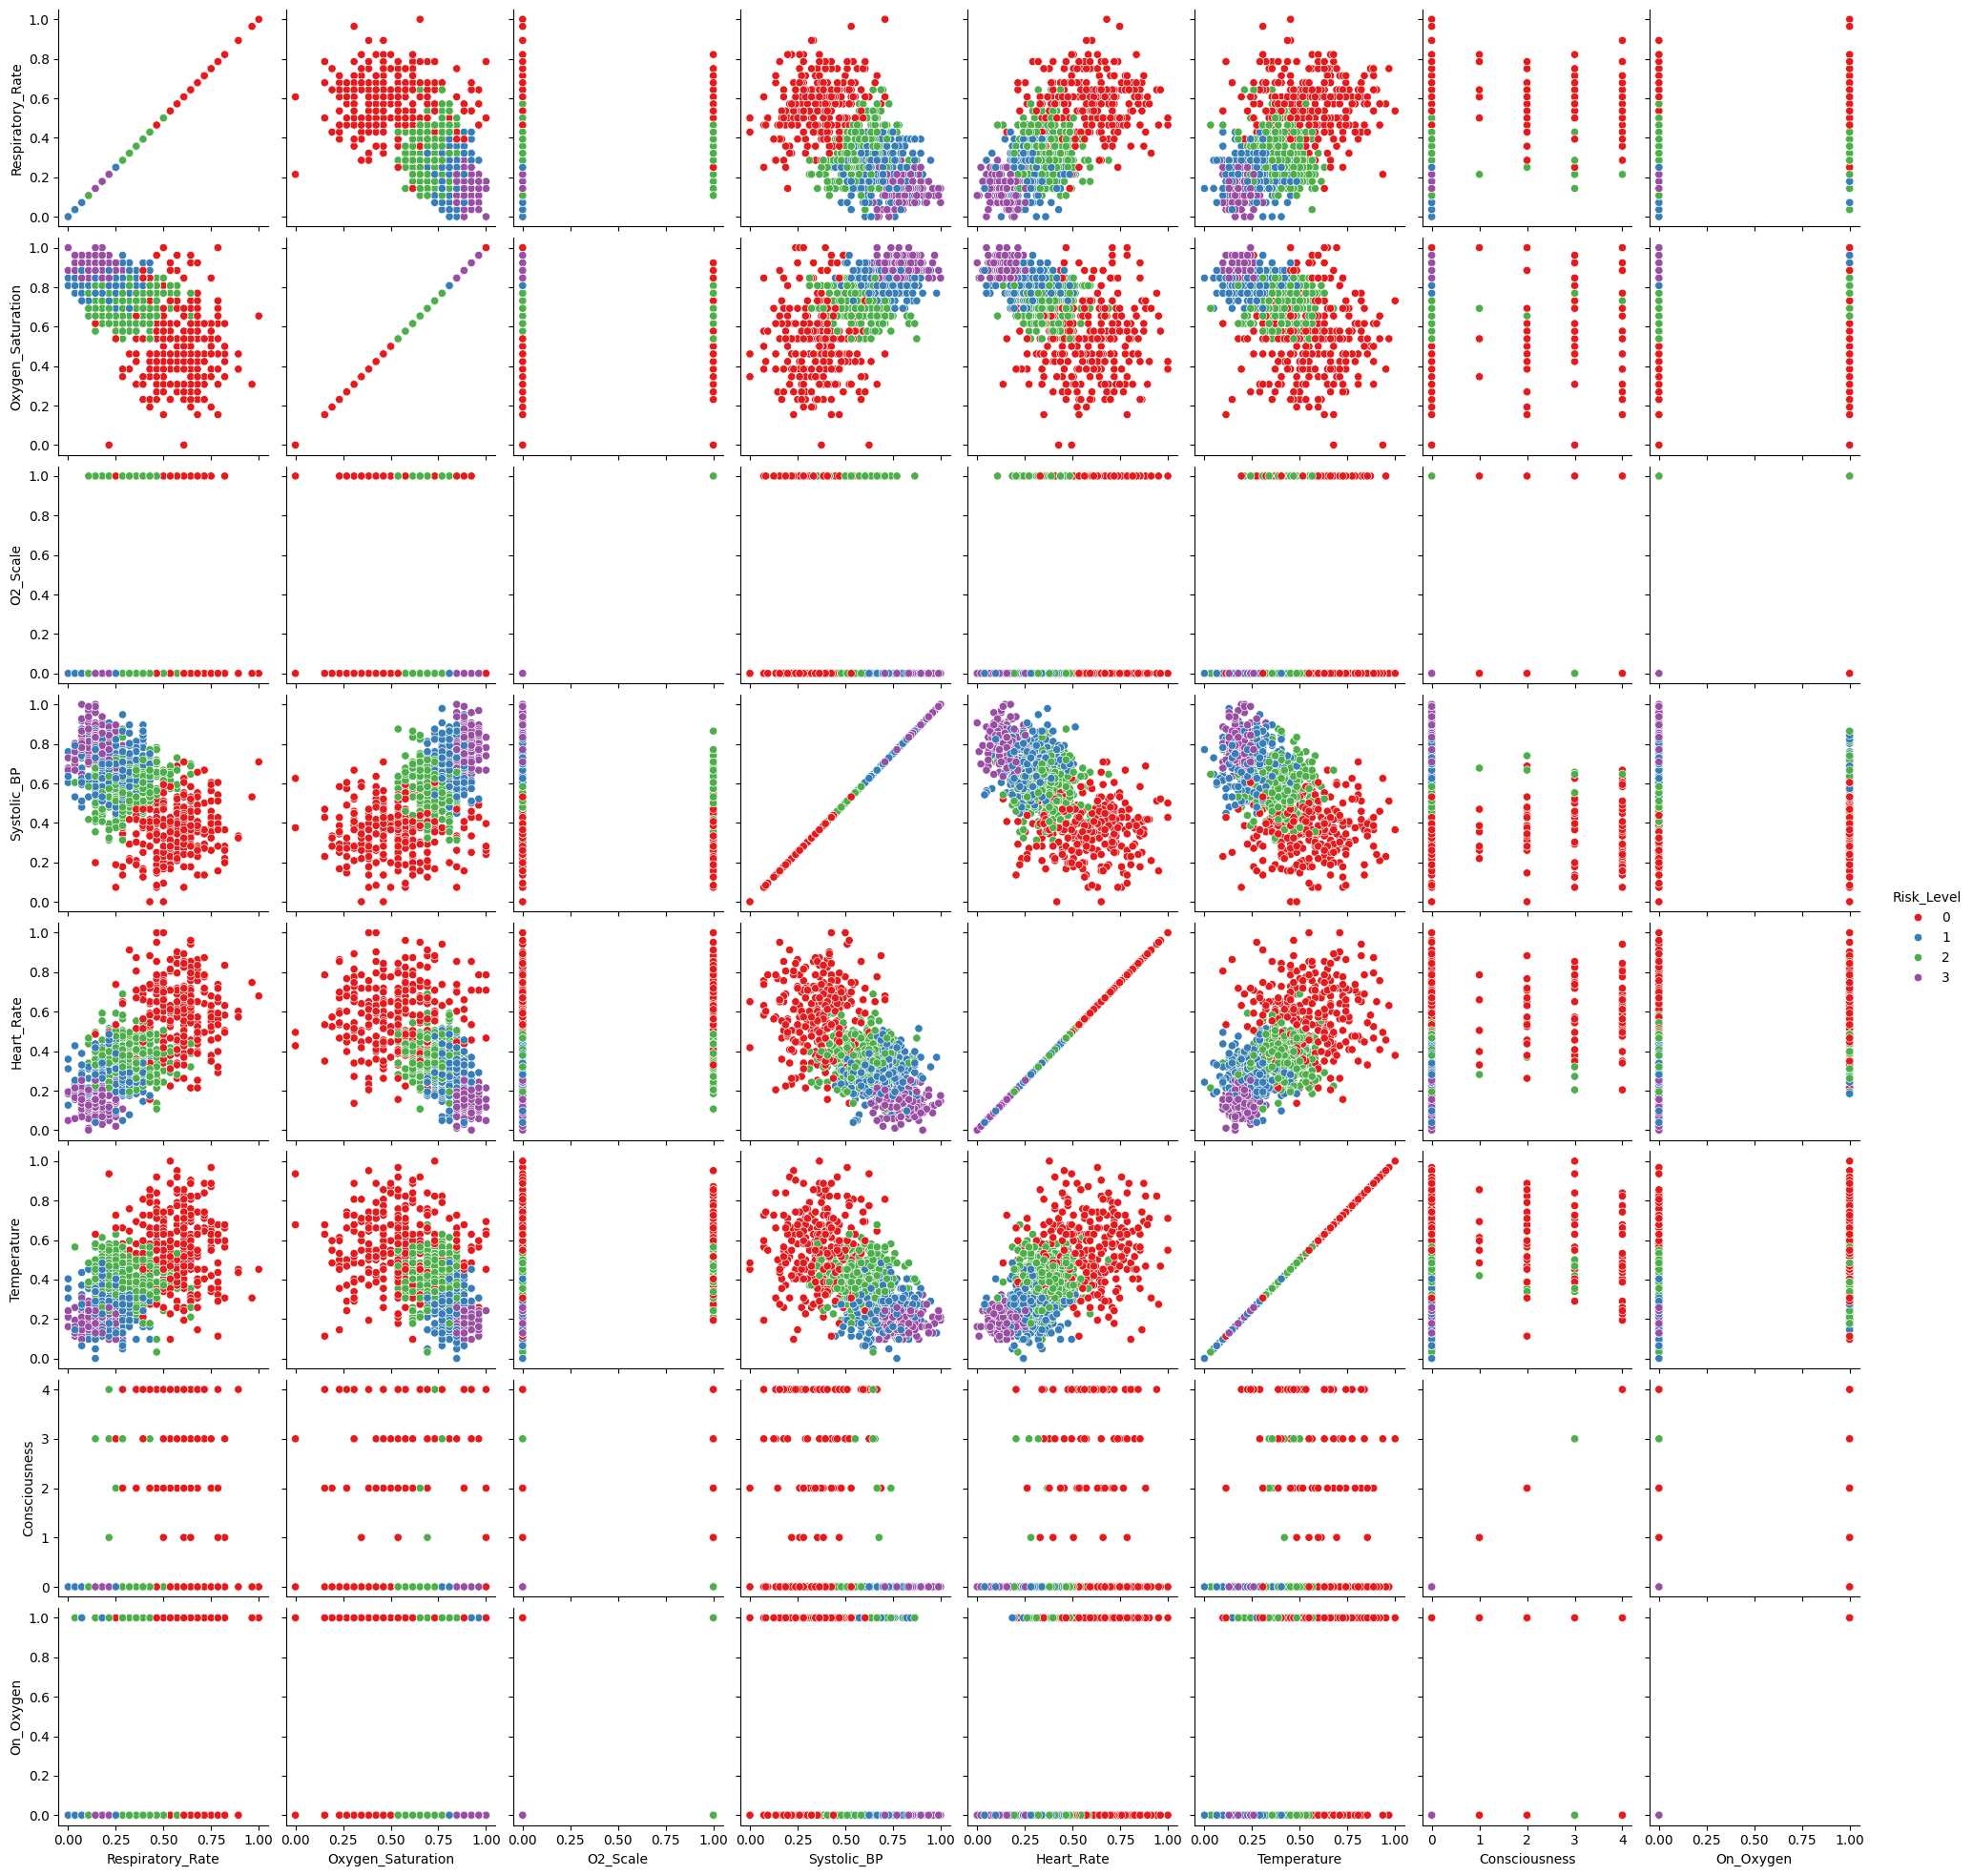

In [16]:
sns.pairplot(df, hue='Risk_Level', palette='Set1', diag_kind=None)


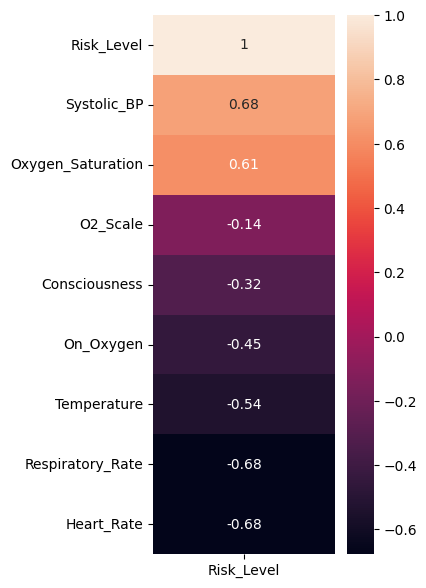

In [17]:
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
sns.heatmap(data=df.corr()["Risk_Level"].sort_values(ascending=False).to_frame(),annot=True)
plt.show()

In [18]:
target = "Risk_Level"

corr = df.corr(method='pearson')

target_corr = corr[target].drop(target)

top_pos = target_corr.sort_values(ascending=False).head(5)
top_neg = target_corr.sort_values(ascending=True).head(5)

print("Top 5 Positive correlations with Risk Level:")
print(top_pos)

print("\nTop 5 Negative correlations with Risk Level:")
print(top_neg)

Top 5 Positive correlations with Risk Level:
Systolic_BP          0.680155
Oxygen_Saturation    0.612345
O2_Scale            -0.135767
Consciousness       -0.320634
On_Oxygen           -0.450297
Name: Risk_Level, dtype: float64

Top 5 Negative correlations with Risk Level:
Heart_Rate         -0.676924
Respiratory_Rate   -0.676821
Temperature        -0.536272
On_Oxygen          -0.450297
Consciousness      -0.320634
Name: Risk_Level, dtype: float64


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

Logistic Regression Training Accuracy: 93.7500
Logistic Regression Test Accuracy: 93.0000
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.94      0.86      0.90        51
           2       0.87      0.97      0.91        61
           3       0.97      0.94      0.95        32

    accuracy                           0.93       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



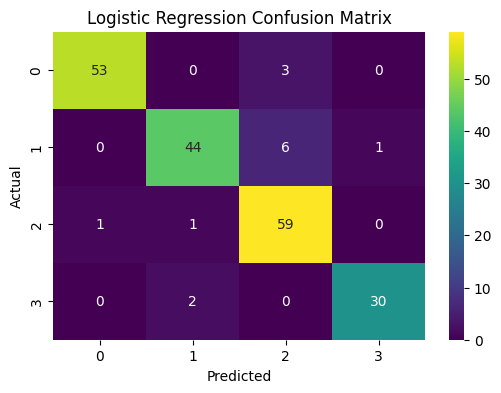

---------------------------------------------------------------------- 



Support Vector Machine Training Accuracy: 95.3750
Support Vector Machine Test Accuracy: 94.0000
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.92      0.96      0.94        51
           2       0.93      0.90      0.92        61
           3       1.00      0.94      0.97        32

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



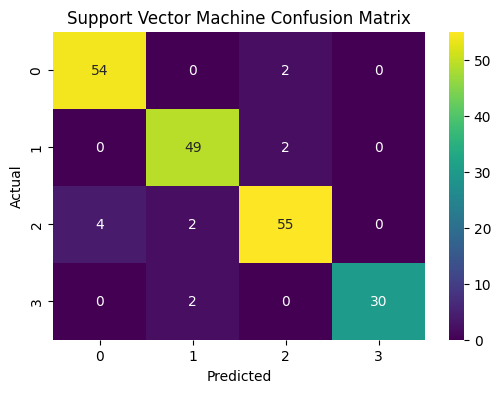

---------------------------------------------------------------------- 



Random Forest Training Accuracy: 100.0000
Random Forest Test Accuracy: 96.0000
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.94      0.94      0.94        51
           2       0.92      0.97      0.94        61
           3       1.00      0.97      0.98        32

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



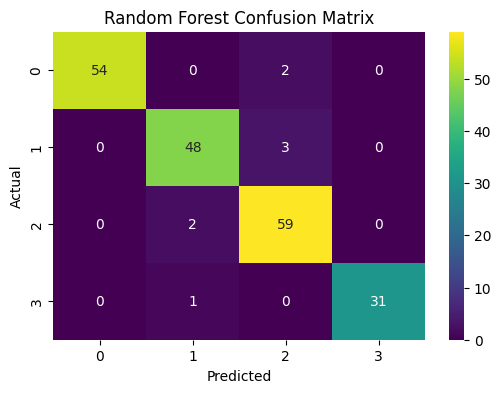

---------------------------------------------------------------------- 



K-Nearest Neighbors Training Accuracy: 95.3750
K-Nearest Neighbors Test Accuracy: 96.0000
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.98      0.98      0.98        51
           2       0.97      0.93      0.95        61
           3       0.97      0.97      0.97        32

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



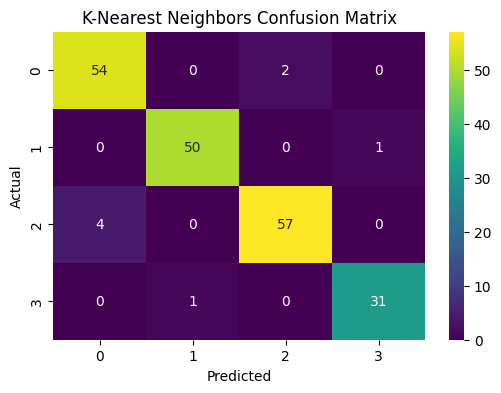

---------------------------------------------------------------------- 



Decision Tree Training Accuracy: 100.0000
Decision Tree Test Accuracy: 91.0000
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.84      0.90      0.87        51
           2       0.88      0.82      0.85        61
           3       1.00      1.00      1.00        32

    accuracy                           0.91       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.91      0.91      0.91       200



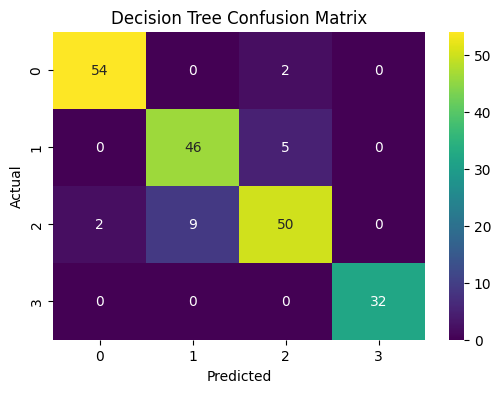

---------------------------------------------------------------------- 



Gradient Boosting Training Accuracy: 100.0000
Gradient Boosting Test Accuracy: 97.0000
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.98      0.94      0.96        51
           2       0.92      1.00      0.96        61
           3       1.00      0.97      0.98        32

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



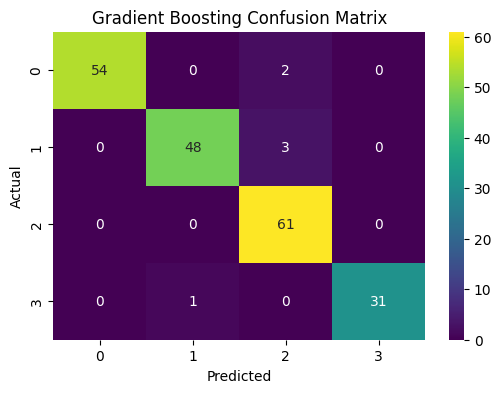

---------------------------------------------------------------------- 





In [20]:
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    training_accuracy = model.score(X_train, y_train)*100
    results[model_name] = accuracy
    print(f"{model_name} Training Accuracy: {training_accuracy:.4f}")
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("-" * 70, "\n")
    print("\n")

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

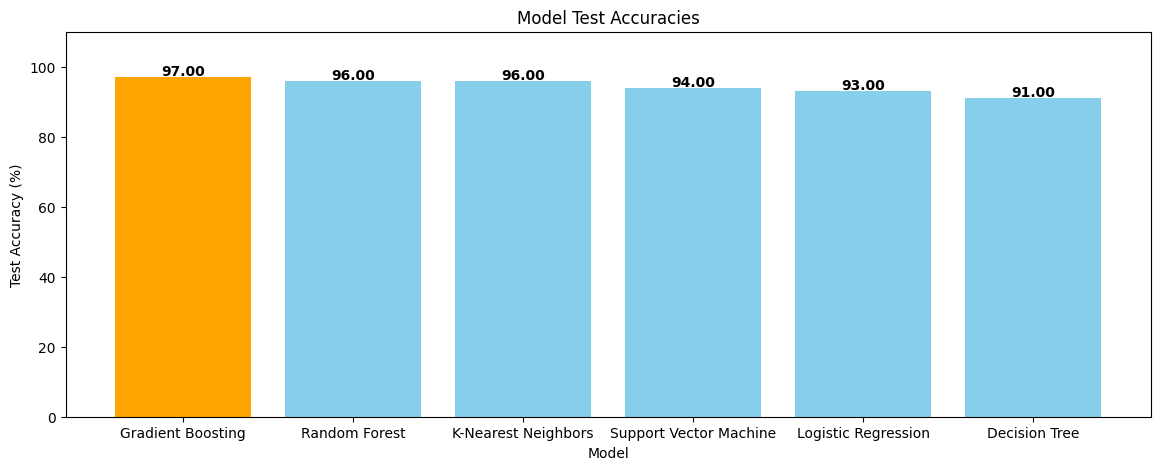

In [21]:
plt.figure(figsize=(14,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy (%)')
plt.title('Model Test Accuracies')

max_idx = results_df['Accuracy'].idxmax()
plt.bar(results_df['Model'][max_idx], results_df['Accuracy'][max_idx], color='orange')

# Annotate accuracy values
for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontweight='bold')

plt.ylim(0, 110)
plt.show()

In [22]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print("Best model:", best_model_name)

Best model: Gradient Boosting


In [23]:
import pickle

with open("health_risk_model.pkl", "wb") as file:
    pickle.dump(best_model, file)


In [24]:
import pickle

with open("health_risk_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

pred = loaded_model.predict(X_test)
print("Loaded model accuracy:", accuracy_score(y_test, pred))


Loaded model accuracy: 0.97


In [25]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)


In [26]:
scaler = pickle.load(open("scaler.pkl", "rb"))
